## <b>Chapter 7.감정 분석(Sentiment Analysis)</b>

### 1. 감정분석의 개념

* 감정 분석은 텍스트에 등장하는 단어들을 통해 어떤 감정이 드러나는지 분석하는 기법이다.
* 감정 분석은 오피니언 마이닝으로도 불리며, 텍스트에 담긴 의견, 태도 등을 알아보는데 유용한 기법이다.
* 감정 분석을 하기 위해선 미리 정의된 감정 어휘 사전이 필요하다.
* 감정 어휘 사전에 포함된 어휘가 텍스트에 얼마나 분포하는지에 따라 해당 텍스트의 감정이 좌우한다.
* 토픽 모델링이 텍스트의 주제를 찾아낸다면, 감정 분석은 텍스트의 의견을 찾아낸다.
* 텍스트는 주제(토픽)와 의견(감정)의 결합으로 이루어졌다고 볼 수 있다.
* 감정 분석은 SNS, 리뷰 분석에 유용하게 사용할 수 있다.
* 특정 이슈에 대한 사람들의 감정을 실시간으로 분석한다면, 그에 대해 신속하게 대처 가능하다.

### 2. 파이썬으로 감정을 분석하는 방법

+ 감정 어휘 사전을 이용한 감정 상태 분류
  -  미리 분류해 둔 감정어 사전을 통해 분석하고자 하는 텍스트의 단어들을 사전에 기반해 분류하고, 그 감정 점수를 계산한다.
  - 이 때 사용되는 감정어 사전에는 해당 감정에 해당되는 단어를 미리 정의해둬야 한다.
+ 기계학습을 이용한 감정 상태 분류
  - 분석 데이터의 일부를 훈련 데이터로 사용해 그로부터 텍스트의 감정 상태를 분류한다.
  - 이 때 사용되는 훈련 데이터는 사용자가 분류한 감정 라벨이 포함되어 있어야 하며, 이를 인공 신경망, 의사 결정 트리 등의 기계 학습 알고리즘을 사용하여 분류한다.

### 3. 감정 어휘 사전(afinn)을 이용한 감정 상태 분류

#### 1) 감정 사전 준비

*   감정 사전 라이브러리 afinn을 설치한다.
*   afinn은 영어에 대한 긍정, 부정에 대한 감정 사전을 제공한다.

#### 2) 데이터 준비

- 사용할 데이터를 구성 : 사이킷런에 내장되어 있는 뉴스그룹 데이터를 이용한다.

In [1]:
from sklearn.datasets import fetch_20newsgroups

newsdata = fetch_20newsgroups(subset='train')
newsdata.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

#### 3) 감정 상태 분류 및 시각화

*   감정 사전을 구성하고 감정 스코어를 측정한다.
*   afinn 라이브러리는 감정 사전과 더불어 편리하게 감정가를 계산할 수 있는 함수를 제공한다.

##### ① afinn 객체 생성

In [2]:
from afinn import Afinn

afinn = Afinn()

##### ② 뉴스별 감정 점수 측정

In [3]:
for i in range(10):
    print(afinn.score(newsdata.data[i]))

7.0
11.0
16.0
5.0
-23.0
-25.0
7.0
3.0
16.0
-20.0


##### ④ plt 스타일 설정

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
plt.style.use('seaborn-white')

##### ⑤ 시각화  * 2분30초 소요

In [6]:
positive = 0
neutral = 0
negative = 0

for i in newsdata.data:
    score = afinn.score(i)
    if score > 0:
        positive += 1
    elif score == 0:
        neutral += 1
    else :
        negative += 1

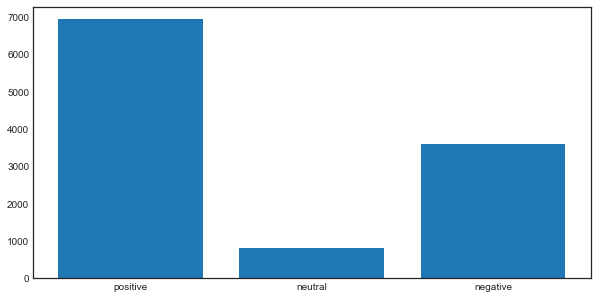

In [7]:
plt.figure(figsize=(10,5))
plt.bar(np.arange(3), [positive, neutral, negative])
plt.xticks(np.arange(3), ['positive', 'neutral', 'negative'])

plt.show()

### 4. 감정 어휘 사전(KNU)을 이용한 문서 감정 분석

- 한국어 감정 사전
   - 서울대에서 개발한 KOSAC은 개발자에게 동의를 얻어 사용가능 : KoNLPy에서 사용 가능하다.
      - http://word.snu.ac.kr/kosac/lexicon.php
   - 군산대학교(KNU)에서 새발한 사전은 특정 단어의 감성지수를 손쉽게 이용 가능하다.
      - http://dilab.kunsan.ac.kr/knusl.html
   - 연세대학교 오픈한글 프로젝트 : http://openhangul.com/

#### 1) 감정사전 불러오기 : KNU 데이터 사용  * 한국어 감정어휘 사전이 공개되지 않아 영문 텍스트 감정분석

##### ① 감정사전 열기

In [8]:
dic1 = open('dict/positive-words.txt')
dic2 = open('dict/negative-words.txt')

##### ② 감정사전 리스트로 만들기

In [9]:
positive_words=[]
negative_words=[]

for line in dic1:
    positive_words.append(line.strip('\n'))
for line in dic2:
    negative_words.append(line.strip('\n'))

In [10]:
positive_words[0:10]

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation']

In [11]:
negative_words[0:10]

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination']

##### ③ 데이터 가져오기 : 지속가능 보고서 회장 인사말

In [12]:
import pandas as pd
df = pd.read_csv('data_set/CEO3.csv', encoding='latin')
df[0:7]

,number,firm,publishing,country,text,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 450,Unnamed: 451,Unnamed: 452,Unnamed: 453,Unnamed: 454,Unnamed: 455,Unnamed: 456,Unnamed: 457,Unnamed: 458,Unnamed: 459
0,2,Amorepacific,1,Korea,We will use beauty to change the world and bec...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,Amorepacific,3,Korea,AMOREPACIFC Group will endeavor to become a gr...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,502,Amorepacific,4,Korea,AMOREPACIFIC Group has been pursuing the path ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,Asiana Airlines,1,Korea,This year marks the 25th anniversary of the es...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,Asiana Airlines,2,Korea,"Since the inception, Asiana Airlines has pledg...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,7,Asiana Airlines,3,Korea,All of us will do our best without stopping fo...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,503,Asiana Airlines,4,Korea,"First of all, I would like to express my heart...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### ④ 전처리 : 2~3개씩 기업별로 있는 인사말을 하나의 딕셔너리에 기업별로 통합

In [13]:
firm = df.get('firm')
text = df.get('text')

In [14]:
company = {}

for i in range(len(firm)):
    if company.get(firm[i]) != None:
        company[firm[i]] = company.get(firm[i]) + "\n" + text[i]
        
    else:
        company[firm[i]] = text[i]

In [18]:
company.get('Asiana Airlines')[:500]

'This year marks the 25th anniversary of the establishment of Asiana Airlines since it embarked on its journey to a\nbrighter future. We are truly grateful to all stakeholders who have loved and rooted for us for the past 25 years. Thanks\nto your support, Asiana Airlines was able to become the 1st airline to be named as the Airline of the Year for five\nconsecutive times.\nAsiana Airlines has unwavering commitment to its responsibility as Beautiful Company that creates the best\ncorporate value in th'

##### ⑤ 토큰화

In [19]:
from nltk.corpus import gutenberg
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [20]:
import nltk
nltk.download('punkt')
tokens=[]
for f, t in company.items(): 
    token=word_tokenize(t)
    tokens.append([f,token])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\poscouser\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
company.items()

In [ ]:
print(tokens)

##### ⑥ 감정(긍정/부정) 계산

- 감정분석을 위해 각 토큰마다 긍정에 해당하면 +1, 부정에 해당하면 -1로 계산한다.
- 전체 단어의 수로 나누어서 각 기업마다 감정점수(긍정-부정 정도)를 계산한다.

In [47]:
sentiment_firm=[]

for token in tokens: 
    firm=token[0] 
    sentiment=0 
    count=0 
    
    for t in token[1]: 
        if t in positive_words: 
            sentiment+=1
            count+=1
        elif t in negative_words:
            sentiment -=1
            count+=1
    
    sentiment_firm.append([firm,sentiment/count])

sentiment_firm[0:10] 

[['Amorepacific', 0.873015873015873],
 ['Asiana Airlines', 0.768595041322314],
 ['BNK Financial Group Inc.', 0.9344262295081968],
 ['BPA', 0.8823529411764706],
 ['BS FINANCIAL GROUP INC', 0.68],
 ['CJ', 0.5555555555555556],
 ['Coway', 0.8125],
 ['Daelim', 0.75],
 ['Daewoo E&C', 0.4533333333333333],
 ['Daum Communications', 0.5652173913043478]]

##### ⑦ 감정분석한 결과 시각화

In [48]:
import numpy as np
import matplotlib.pyplot as plt

a=[]
for firm in sentiment_firm:
    a.append(firm[1]*100)
X=np.arange(len(a)) 

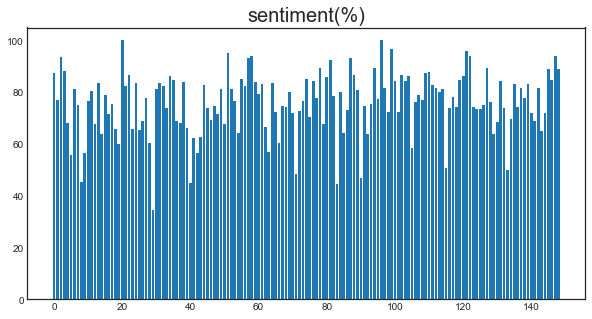

In [49]:
plt.figure(figsize=(10,5))
plt.title("sentiment(%)",fontsize=20)
plt.bar(X,a) 

plt.show()

### 5. 세분화된 감정 분석

##### ① 감정어휘집 읽기
- py_lex에 있는 감정어휘집을 이용하여 매우 다양한 세부 감정에 대해 분석 가능

In [51]:
from py_lex import Liwc, EmoLex
import pandas as pd
emotion_dic=pd.read_excel('dict/NRC-Emotion-Lexicon-v0.92-In105Languages-Nov2017Translations_ENG.xlsx')
emotion_dic[0:10]

,English (en),Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,1,0,0,0,1,0,1,0,0
3,abandoned,0,1,1,0,0,1,0,1,0,0
4,abandonment,0,1,1,0,0,1,0,1,1,0
5,abate,0,0,0,0,0,0,0,0,0,0
6,abatement,0,0,0,0,0,0,0,0,0,0
7,abba,1,0,0,0,0,0,0,0,0,0
8,abbot,0,0,0,0,0,0,0,0,0,1
9,abbreviate,0,0,0,0,0,0,0,0,0,0


In [52]:
df=emotion_dic.set_index('English (en)') 

In [53]:
df[0:10]

,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
English (en),,,,,,,,,,
aback,0,0,0,0,0,0,0,0,0,0
abacus,0,0,0,0,0,0,0,0,0,1
abandon,0,1,0,0,0,1,0,1,0,0
abandoned,0,1,1,0,0,1,0,1,0,0
abandonment,0,1,1,0,0,1,0,1,1,0
abate,0,0,0,0,0,0,0,0,0,0
abatement,0,0,0,0,0,0,0,0,0,0
abba,1,0,0,0,0,0,0,0,0,0
abbot,0,0,0,0,0,0,0,0,0,1


##### ② 각 토큰에 대해서 감정 사전의 다양한 감정 정보로 세분화하여 계산 : 각 기업마다 감정의 정도를 계산한 결과를 가지게 됨

In [54]:
import matplotlib.pyplot as plt
import numpy as np

emotion_firm=[]

for token in tokens: 
    firm=token[0]
    sentiment=0 
    count=0 

    arr=[] 
    senti_count=0
    for t in token[1]:
        if t in df.index: 
            count+=1
            arr.append(list(df.loc[t])) 
            if np.sum(list(df.loc[t]))!=0: 
                senti_count+=1 
    emotion_firm.append([firm,np.sum(arr,axis=0),senti_count/count]) 

emotion_firm[0:10]

[['Amorepacific',
  array([172,  12,   4,  45,   3,  16,  71,   5,  12,  64]),
  0.4188911704312115],
 ['Asiana Airlines',
  array([147,  14,   9,  49,   5,  15,  41,   4,  17,  89]),
  0.41237113402061853],
 ['BNK Financial Group Inc.',
  array([96,  6,  2, 19,  2,  1, 20,  3,  2, 51]),
  0.43636363636363634],
 ['BPA', array([47,  6,  1, 12,  2,  2,  8,  2,  2, 24]), 0.34523809523809523],
 ['BS FINANCIAL GROUP INC',
  array([77,  6,  0, 19,  0,  3, 21,  3,  3, 40]),
  0.38],
 ['CJ', array([39,  9,  0,  6,  1,  4, 13,  3,  2, 25]), 0.4435483870967742],
 ['Coway',
  array([39,  1,  1, 17,  0,  1, 18,  1,  0, 23]),
  0.37606837606837606],
 ['Daelim',
  array([71, 14,  4, 12,  4, 13, 18,  8,  4, 29]),
  0.45918367346938777],
 ['Daewoo E&C',
  array([181,  46,   9,  50,  11,  14,  33,  15,  16,  96]),
  0.48727272727272725],
 ['Daum Communications',
  array([36,  7,  2, 24,  1,  3,  9,  1,  1, 15]),
  0.4645669291338583]]

In [55]:
df.loc['abba']

Positive        1
Negative        0
Anger           0
Anticipation    0
Disgust         0
Fear            0
Joy             0
Sadness         0
Surprise        0
Trust           0
Name: abba, dtype: int64

##### ③ 시각화 하기 위해 각 기업마다 계산된 결과를 세분화된 감정으로 분류하여 저장

In [56]:
emotion_result=[]
for firm in emotion_firm:
    emotion_result.append({"Firm" : firm[0],
                           "Positive": str("%0.2f"%( firm[1][0]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Negative" : str("%0.2f"%( firm[1][1]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Anger" : str("%0.2f"%( firm[1][2]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Anticipation" : str("%0.2f"%( firm[1][3]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Disgust" : str("%0.2f"%( firm[1][4]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Fear" : str("%0.2f"%( firm[1][5]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Joy" : str("%0.2f"%( firm[1][6]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Sadness" : str("%0.2f"%( firm[1][7]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Surprise" : str("%0.2f"%( firm[1][8]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Trust" : str("%0.2f"%( firm[1][9]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Sentiwords / non-sentiwords (%)":str("%0.2f"%(firm[2]*100))+"%"}
                          )
emotion_result[0:10]

[{'Firm': 'Amorepacific',
  'Positive': '93.48%',
  'Negative': '6.52%',
  'Anger': '2.17%',
  'Anticipation': '24.46%',
  'Disgust': '1.63%',
  'Fear': '8.70%',
  'Joy': '38.59%',
  'Sadness': '2.72%',
  'Surprise': '6.52%',
  'Trust': '34.78%',
  'Sentiwords / non-sentiwords (%)': '41.89%'},
 {'Firm': 'Asiana Airlines',
  'Positive': '91.30%',
  'Negative': '8.70%',
  'Anger': '5.59%',
  'Anticipation': '30.43%',
  'Disgust': '3.11%',
  'Fear': '9.32%',
  'Joy': '25.47%',
  'Sadness': '2.48%',
  'Surprise': '10.56%',
  'Trust': '55.28%',
  'Sentiwords / non-sentiwords (%)': '41.24%'},
 {'Firm': 'BNK Financial Group Inc.',
  'Positive': '94.12%',
  'Negative': '5.88%',
  'Anger': '1.96%',
  'Anticipation': '18.63%',
  'Disgust': '1.96%',
  'Fear': '0.98%',
  'Joy': '19.61%',
  'Sadness': '2.94%',
  'Surprise': '1.96%',
  'Trust': '50.00%',
  'Sentiwords / non-sentiwords (%)': '43.64%'},
 {'Firm': 'BPA',
  'Positive': '88.68%',
  'Negative': '11.32%',
  'Anger': '1.89%',
  'Anticipatio

##### ④ 세분화하여 감정분석한 결과를 3차원으로 시각하하기 위해 x,y,z정보를 정의

In [57]:
y=[]
for firm in emotion_firm:
    y.append(list(firm[1][2:]))
x=['Positive','Negative','Anger','Anticipation','Disgust','Fear','Joy','Sadness','Suprise','Trust']
z=[]
for firm in emotion_firm:
    z.append(firm[0])

##### ⑤ 세부 감정대로 나온 결과를 3차원으로 시각화

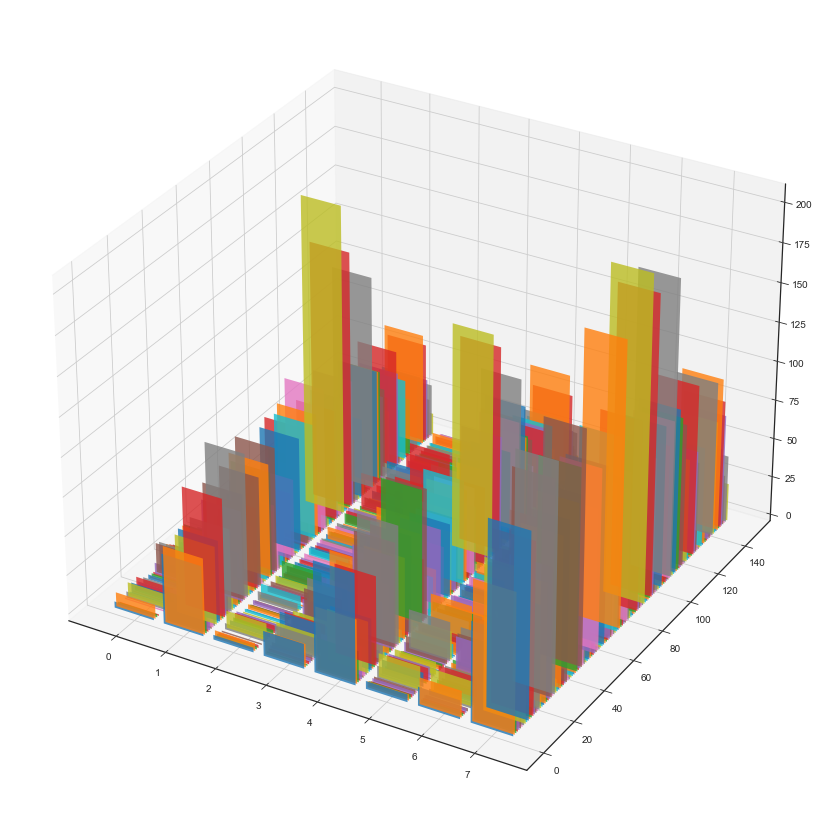

In [58]:
fig=plt.figure()
fig.set_size_inches(15, 15, 15) 

ax = fig.add_subplot(projection='3d') 

for firm in emotion_firm:
    xs=np.arange(8)

    ys=firm[1][2:]
    zs=emotion_firm.index(firm)
    ax.bar(xs,ys,zs,zdir='y',alpha=0.8)

plt.show()

##### ⑧ 감정 종류별 시각화

- 각 기업마다 세분화하여 감정분석한 결과를 2차원 막대 그래프로 시각화
- x는 기업, y는 감정에 해당하는 단어들의 수
- 막대 그래프 내에 세분화된 감정들이 종류별로 시각화

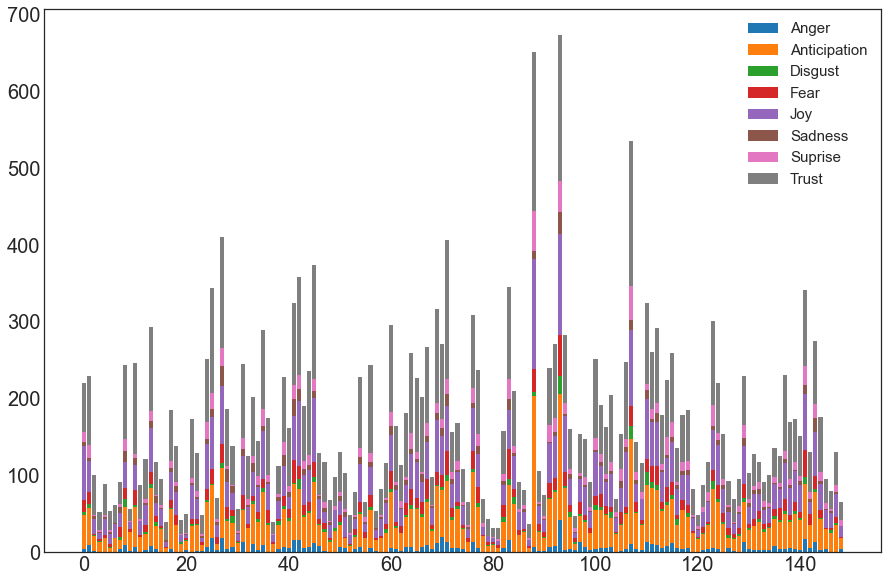

In [59]:
E=[]
plt.rcParams["figure.figsize"]=(15,10)
plt.rcParams["ytick.labelsize"]=20
plt.rcParams["xtick.labelsize"]=20
plt.rcParams["legend.fontsize"]=15

for firm in emotion_firm:
    E.append(firm[1][2:])
a=np.transpose(E)
X=np.arange(len(a[0]))

plt.bar(X,a[0],label='Anger')
plt.bar(X,a[1],bottom=a[0],label='Anticipation')
plt.bar(X,a[2],bottom=sum(a[0:2]),label='Disgust')
plt.bar(X,a[3],bottom=sum(a[0:3]),label='Fear')
plt.bar(X,a[4],bottom=sum(a[0:4]),label='Joy')
plt.bar(X,a[5],bottom=sum(a[0:5]),label='Sadness')
plt.bar(X,a[6],bottom=sum(a[0:6]),label='Suprise')
plt.bar(X,a[7],bottom=sum(a[0:7]),label='Trust')

plt.xlabel="Firm index"
plt.legend()
plt.show()